In [648]:
import geopandas as gpd
from shapely.geometry.polygon import Polygon
from shapely.geometry.multipolygon import MultiPolygon
from shapely.ops import cascaded_union
import numpy as np
import os
import sys
import pandas as pd

In [649]:
municipios_para = gpd.GeoDataFrame.from_file('15MUE250GC_SIR.shp')
deflorestation = gpd.GeoDataFrame.from_file('./approach/Deter_201701_shp/Deter_201711.shp')
idname = [n for n in deflorestation.linkcolumn]

In [650]:
centroids = [np.dstack(d.centroid.coords.xy).tolist() for d in deflorestation.geometry]
centroids = [c[0][0] for c in centroids]
centroids = [list(map(float, (y, x))) for x, y in centroids]
line = []
for x in range(len(centroids)):
    with open('./points/'+str(idname[x])+'.txt', 'a') as f:
        f.write(str(centroids[x][0])+' '+str(centroids[x][1]))

In [651]:
answer = [] 
for idx, row in municipios_para.iterrows():
    if type(row.geometry) == MultiPolygon:
        row = [kk for kk in row.geometry]
        row = cascaded_union(row)
        row = row.convex_hull
    answer.append(row)       

In [653]:
# ansss = [] 
# for idx, row in municipios_para.iterrows():
#     if type(row.geometry) == MultiPolygon:
#         multi = [kk for kk in row.geometry]
#         print(len(multi))
#         ansss.append(cascaded_union(multi)       

In [654]:
columns = list(municipios_para.columns)

In [655]:
city_names = list(municipios_para.NM_MUNICIP)
city_names = [city.replace("'", "") for city in city_names]

In [455]:
# def getPolygonCity(name):
#     name = name.upper()
#     query = "%s == '%s'"%(columns[0], name)
#     return municipios_para.query(query)

# def getPoints(city):
#     line = getPolygonCity(city)
    
#     list_r = [list(map(float, (y, x))) for x, y in np.dstack(g[8].boundary.coords.xy).tolist()[0]]
    
#     return list_r

# def writePoints(city):
#     points = getPoints(city)
#     line = ''
    
#     for x,y in points:
#         line += ' '+str(x)
#         line += ' '+str(y)
    
#     with open('./polygons/'+(city.lower())+'.txt', 'a') as f:
#         f.write(line)

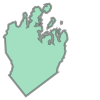

In [719]:
list(getPolygonCity('AUGUSTO CORRÊA').geometry)[0]

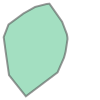

In [720]:
convexHull(list(getPolygonCity('AUGUSTO CORRÊA').geometry)[0])

In [689]:
piçarra.txt

In [697]:
pp.boundary.coords.xy

(array('d', [-46.54846459099999, -46.573203113999966, -46.60166772900005, -46.63460808799999, -46.635236533999944, -46.65181060100003, -46.66264683400001, -46.66234011300003, -46.63786201900002, -46.56033966699986, -46.500195954000006, -46.44255521199995, -46.439448506999945, -46.43480387100005, -46.42699839699993, -46.41958371899999, -46.361306909999975, -46.33677640399998, -46.33425222900002, -46.33377831699998, -46.33382912200001, -46.34316956399995, -46.34572317800003, -46.35162072600003, -46.385023541999956, -46.54846459099999]),
 array('d', [-1.335424407043945, -1.3043526550429974, -1.2685910740417938, -1.2271953780404488, -1.2264051280404331, -1.110172882036622, -1.030627758033944, -1.0292143260338804, -0.9653879400318388, -0.9080787520299083, -0.8744625640287609, -0.8598504990282976, -0.8593781750282972, -0.8588221350282055, -0.8579102280282527, -0.8682964870285659, -0.9514149750314118, -1.015776273033481, -1.0306219680339126, -1.0371288470342321, -1.042112384034283, -1.1032378

In [716]:
def convexHull(multipolygon):
    return cascaded_union([m for m in multipolygon]).convex_hull

def getPolygonCity(name):
    name = name.upper()
    query = "%s == '%s'"%(columns[0], name)
    return municipios_para.query(query)

def getPoints(city):
    try:
#         print(city)
        points = getPolygonCity(city)
        coords = None

        if type(list(points.geometry)[0]) == MultiPolygon:
            points = convexHull(list(points.geometry)[0])
#             print('Alter to ', type(points))
            coords = points.boundary.coords.xy
        else:
            coords = list(points['geometry'])[0].boundary.coords.xy

    #     coords = list(points['geometry'])[0].boundary.coords.xy
        line = ''
        for x in range(len(coords[0])):
            line += ' '+str(coords[1][x])+' '+str(coords[0][x])

        return line
    except IndexError:
        print('Error: ', city)

def writePoints(city):
    points = getPoints(city)
#     line = ''
    
#     for x,y in points:
#         line += ' '+str(x)
#         line += ' '+str(y)
    
    try:
        with open('./polygons/'+(city.lower())+'.txt', 'a') as f:
            f.write(points)
    except TypeError:
        print('Error to write ', city)

In [657]:
points = getPolygonCity('itaituba')
# list(points['geometry'])[0].boundary.coords.xy
zz = list(points['geometry'])[0].boundary.coords.xy
ll = ''
for x in range(len(zz[0])):
    ll += ' '+str(zz[1][x])+' '+str(zz[0][x])
#     print('{}, {}'.format(zz[1][x], zz[0][x]))

In [717]:
[writePoints(city) for city in city_names]

Error:  PAU DARCO
Error to write  PAU DARCO


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

In [666]:
[getPolygonCity(city) for city in city_names]

[  NM_MUNICIP CD_GEOCMU                                           geometry
 0   ALENQUER   1500404  POLYGON ((-54.86211511799996 0.372521589012336...,
   NM_MUNICIP CD_GEOCMU                                           geometry
 1   ALMEIRIM   1500503  POLYGON ((-54.87225092899999 2.433746586080204...,
   NM_MUNICIP CD_GEOCMU                                           geometry
 2   ALTAMIRA   1500602  POLYGON ((-51.95812355600002 -3.47704330411428...,
   NM_MUNICIP CD_GEOCMU                                           geometry
 3     AVEIRO   1501006  POLYGON ((-55.23386972699995 -3.24192074610664...,
   NM_MUNICIP CD_GEOCMU                                           geometry
 4   BELTERRA   1501451  POLYGON ((-54.83244893099985 -2.66109809308753...,
     NM_MUNICIP CD_GEOCMU                                           geometry
 5  BRASIL NOVO   1501725  POLYGON ((-52.27648706299994 -2.83021522409313...,
   NM_MUNICIP CD_GEOCMU                                           geometry
 6      CURUÁ  

In [184]:
a.query('NM_MUNICIP == "SANTARÉM"')

,NM_MUNICIP,CD_GEOCMU,geometry
21,SANTARÉM,1506807,POLYGON ((-54.51227553699993 -2.10936842906942...


In [159]:
np.dstack(a.geometry[8].centroid.coords.xy).tolist()[0][0][::-1]

[-5.871135291442457, -56.49671530320223]

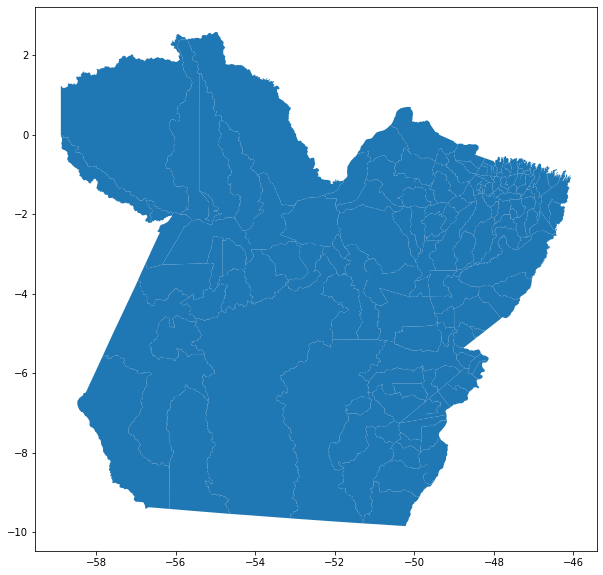

In [14]:
a.plot(figsize=(30, 10))

In [107]:
col = ['NM_MUNICIP']
eom = a.dissolve(by='NM_MUNICIP').geometry[8]
subset = points[gpd.points.within(geom)]

NameError: name 'points' is not defined

In [28]:
g = [i for i in a.geometry]

# all_coords = []
# for b in g[0].boundary:
#     coords = np.dstack(b.coords.xy).tolist()
#     all_coords.append(*coords)                 

# all_coords

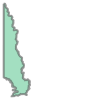

In [489]:
g[0]

In [113]:
len(np.dstack(g[8].boundary.coords.xy).tolist()[0])

4507

In [114]:
inv = [list(map(float, (y, x))) for x, y in np.dstack(g[8].boundary.coords.xy).tolist()[0]]

In [115]:
line = ''
for x,y in inv:
    line += ' '+str(x)
    line += ' '+str(y)
#     line.append(x)
#     line.append(y)

In [117]:
with open('itaituba.txt', 'a') as f:
    f.write(line)

In [83]:
RuntimeError# with open('out.txt', 'a') as f:
#     f.write()
[print('{} {}'.format(x[0], x[1]), end=' ') for x in inv]

2.433746586080204 -54.87225092899999 2.4266944460799778 -54.87625017999995 2.4153254100796104 -54.874696404 2.41217288907945 -54.87236389600001 2.4089368570793965 -54.86769636599999 2.4057771870793587 -54.86802793599998 2.402892959079189 -54.86608315000001 2.4005556690791607 -54.86291683799995 2.398039888079012 -54.85886031800004 2.39416037807883 -54.85783202999996 2.391014129078748 -54.854056569000036 2.3856118800786064 -54.848602934 2.3800327050784773 -54.84258461399995 2.3768791080783203 -54.840361955999995 2.370308121078196 -54.83397450199996 2.365263919078018 -54.829863591999995 2.3617550520777684 -54.82588578999994 2.3513983100774993 -54.817086779000036 2.3483409190774793 -54.81258156800004 2.34527988407725 -54.809638954000015 2.3416748740772206 -54.80756004499996 2.334187681076969 -54.80574955399999 2.3292245560767455 -54.805053557999955 2.3213836780766215 -54.80024818 2.3179651410763924 -54.79616637399995 2.312733211076221 -54.79424938499997 2.309480560076125 -54.79583888500004

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,